# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [68]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [70]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [71]:
# Scrape the website
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
soup = BeautifulSoup(html, 'html.parser')

In [72]:
# Extract all rows of data
all_rows = soup.find_all('tr', class_='data-row')
print(all_rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [73]:
# Create an empty list
weather_data_list = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    # Find all table data cells (<td>) within the current row.
    all_data_cells = row.find_all('td')
    
    # Initialize an empty list to store the data for the current row.
    data_row = []
    
    # Loop through the all 7 data cells in the current row
    for x in range(0,7):
        
        # Append text content of the current cell to the data_row list.
        data_row.append(all_data_cells[x].text)
    
    # Append data_row list to the weather_data_list.
    weather_data_list.append(data_row)

weather_data_list[:5]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]

In [74]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
cols_names = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
weather_data_df = pd.DataFrame(weather_data_list, columns = cols_names)

In [75]:
# Confirm DataFrame was created successfully
weather_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [76]:
# Examine data type of each column
weather_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [77]:
# Change data types for data analysis
weather_data_df['terrestrial_date'] = pd.to_datetime(weather_data_df['terrestrial_date'])
weather_data_df[['sol','ls','month']] = weather_data_df[['sol','ls','month']].astype('int64')
weather_data_df[['min_temp','pressure']] = weather_data_df[['min_temp','pressure']].astype('float64')

In [78]:
# Confirm type changes were successful by examining data types again
weather_data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [79]:
# 1. How many months are there on Mars?
count_months = weather_data_df.groupby('month')['month'].count()
count_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [80]:
# 2. How many Martian days' worth of data are there?
print(f'Martian days worth of data: {len(weather_data_df)}')

Martian days worth of data: 1867


In [81]:
# 3. What is the average low temperature by month?
temp_by_month = weather_data_df.groupby('month')['min_temp'].mean()
temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

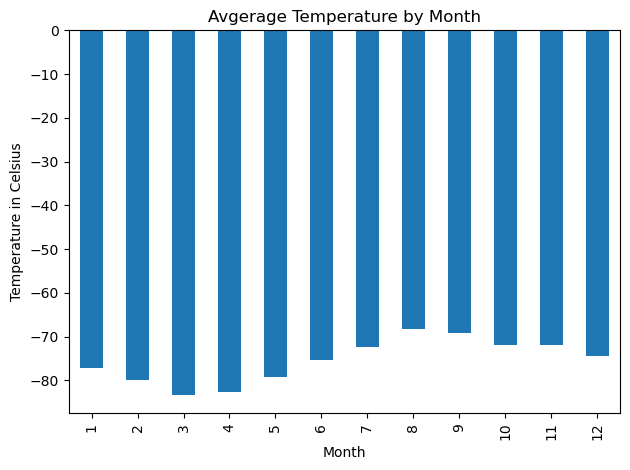

In [82]:
# Plot the average temperature by month
avg_temp_chart = temp_by_month.plot(kind='bar')
avg_temp_chart.set_xlabel("Month")
avg_temp_chart.set_ylabel("Temperature in Celsius")
avg_temp_chart.set_title("Avgerage Temperature by Month")

plt.tight_layout()
plt.show()

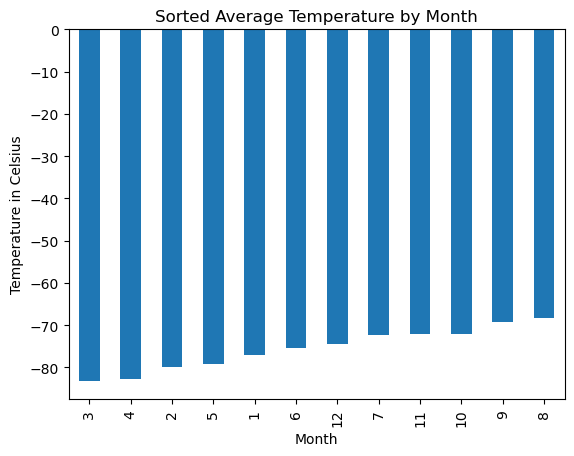

The coldest month is 3 with a temperature of -83.30729166666667°C.
The hottest month is 8 with a temperature of -68.38297872340425°C.


<Figure size 640x480 with 0 Axes>

In [85]:
# Plotting the coldest and hottest months in Curiosity's location
temp_by_month_sorted = temp_by_month.sort_values(ascending=True)
sorted_avg_temp_chart = temp_by_month_sorted.plot(kind='bar')
sorted_avg_temp_chart.set_xlabel("Month")
sorted_avg_temp_chart.set_ylabel("Temperature in Celsius")
sorted_avg_temp_chart.set_title("Sorted Average Temperature by Month")

plt.show()
plt.tight_layout()

# Identifying and printing the coldest and hottest months
coldest_month = temp_by_month_sorted.index[0]
hottest_month = temp_by_month_sorted.index[-1]

coldest_temp = temp_by_month_sorted.iloc[0]
hottest_temp = temp_by_month_sorted.iloc[-1]

print(f"The coldest month is {coldest_month} with a temperature of {coldest_temp}°C.")
print(f"The hottest month is {hottest_month} with a temperature of {hottest_temp}°C.")

In [39]:
# 4. Average pressure by Martian month
pressure_by_month = weather_data_df.groupby('month')['pressure'].mean()
pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

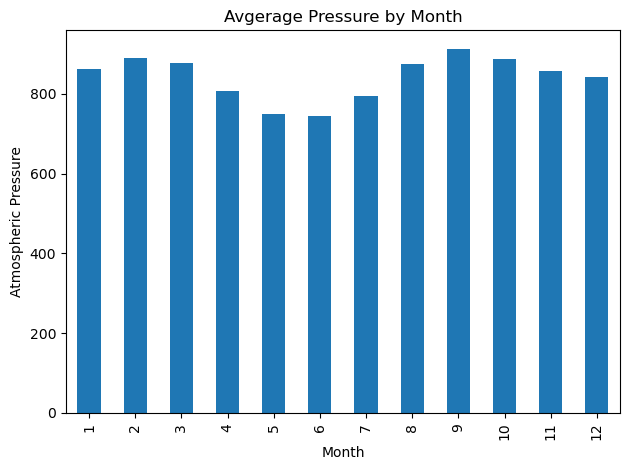

In [41]:
# Plot the average pressure by month
avg_pressure_chart = pressure_by_month.plot(kind='bar')
avg_pressure_chart.set_xlabel("Month")
avg_pressure_chart.set_ylabel("Atmospheric Pressure")
avg_pressure_chart.set_title("Avgerage Pressure by Month")

plt.tight_layout()
plt.show()

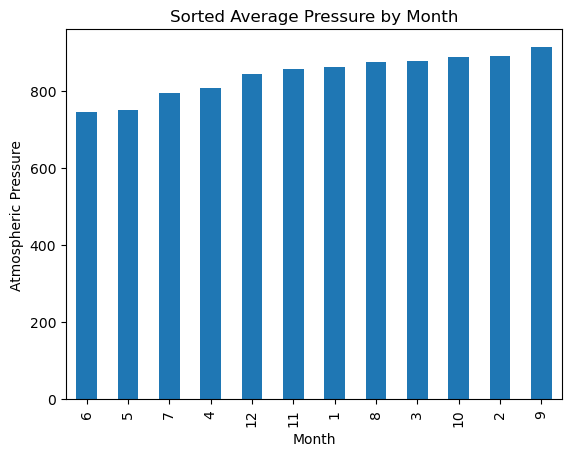

The month with the lowest pressure is 6 with a pressure of 745.0544217687075
The month with the highest pressure is 9 with a pressure of 913.3059701492538


<Figure size 640x480 with 0 Axes>

In [88]:
# Plotting months with the lowest and highest atmospheric pressure readings
pressure_by_month_sorted = pressure_by_month.sort_values(ascending=True)
sorted_avg_press_chart = pressure_by_month_sorted.plot(kind='bar')
sorted_avg_press_chart.set_xlabel("Month")
sorted_avg_press_chart.set_ylabel("Atmospheric Pressure")
sorted_avg_press_chart.set_title("Sorted Average Pressure by Month")

plt.show()
plt.tight_layout()

# Identifying and printing the lowest and highest atmospheric pressure readings
lowest_month = pressure_by_month_sorted.index[0]
highest_month = pressure_by_month_sorted.index[-1]

lowest_pressure = pressure_by_month_sorted.iloc[0]
highest_pressure = pressure_by_month_sorted.iloc[-1]

print(f"The month with the lowest pressure is {lowest_month} with a pressure of {lowest_pressure}")
print(f"The month with the highest pressure is {highest_month} with a pressure of {highest_pressure}")

In [89]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.

# Determine start date of mission by selecting the minimum terrestrial date
mission_start_date = weather_data_df['terrestrial_date'].min()
print(f'Mission Start Date: {mission_start_date}')


Mission Start Date: 2012-08-16 00:00:00


In [90]:
# Add a column to the data frame and store the terrestrial day of the mission by subtracting the mission start date from the terrestrial date
weather_data_df['terrestrial_day'] = (weather_data_df['terrestrial_date'] - mission_start_date).dt.days
weather_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,terrestrial_day
0,2,2012-08-16,10,155,6,-75.0,739.0,0
1,13,2012-08-17,11,156,6,-76.0,740.0,1
2,24,2012-08-18,12,156,6,-76.0,741.0,2
3,35,2012-08-19,13,157,6,-74.0,732.0,3
4,46,2012-08-20,14,157,6,-74.0,740.0,4
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2017
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2019
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2020


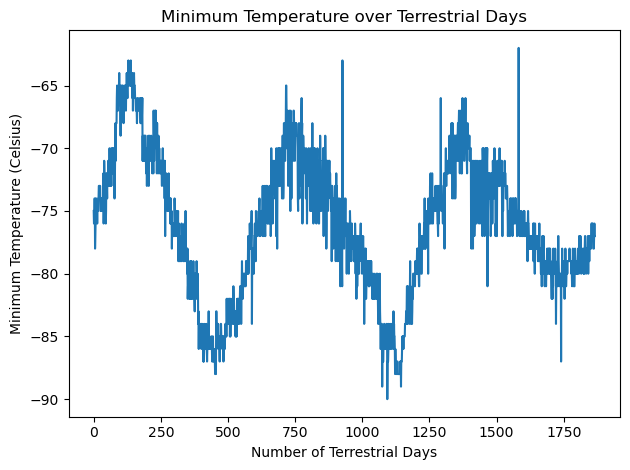

In [64]:
# Plot the minimum temperature for all the terrestrial days
weather_data_df['min_temp'].plot(x='terrestrial_day', y='min_temp')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Minimum Temperature over Terrestrial Days')

plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

Alternatively, we can see a cyclical pattern where Mars orbits the sun 3 times in the provided date range, about 1867. This means that a Martian year is approximately 1867/3 = 622 terrestrial days. Both results are within 25% of the correct number:  687 earth days in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [91]:
# Write the data to a CSV
weather_data_df.to_csv('weather_data.csv', encoding='utf-8')

In [92]:
browser.quit()